Success
Success
Success
Success
Success
Success


C:\ProgramData\Anaconda3\lib\site-packages\skrf\calibration\calibration.py:1051: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  abcTmp, residualsTmp = npy.linalg.lstsq(Q,m)[0:2]


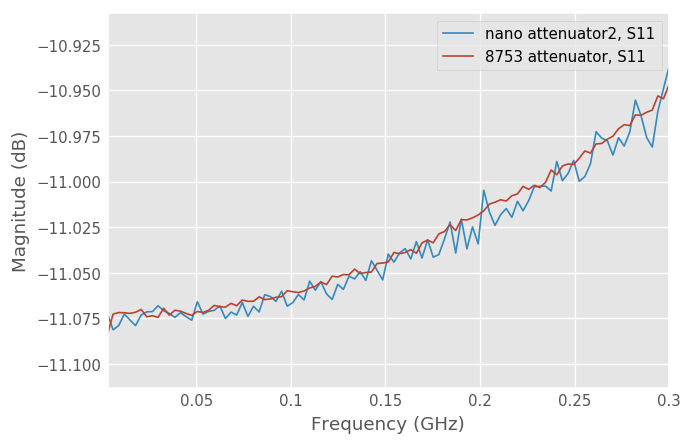

In [33]:
import skrf as rf
from skrf.calibration import OnePort
%matplotlib inline
from pylab import *
rf.stylely()

ideals = rf.read_all('data/ideals/')
measured = rf.read_all('data/measured/')
duts = rf.read_all('data/measured/')
ref = rf.read_all('data/reference/')

## create a Calibration instance
cal_nano = rf.OnePort(
    ideals = [ideals[k] for k in ['short','open','load']],
    measured = [measured[k] for k in ['nano short2','nano open2','nano load2']],
    )

cal_8753 = rf.OnePort(
    ideals = [ideals[k] for k in ['short','open','load']],
    measured = [measured[k] for k in ['8753 short','8753 open','8753 load']],
    )


nano_caled_duts = [cal_nano.apply_cal(dut) for dut in duts.values()]
hp8753_caled_duts = [cal_8753.apply_cal(dut) for dut in duts.values()]

#caled_duts[1].plot_s_db()
#caled_duts[2].plot_s_db()

nano_caled_duts[5].plot_s_db()
hp8753_caled_duts[0].plot_s_db()

nano_caled_duts[5].write_touchstone('nano_attenuator_output', 'data/output')
hp8753_caled_duts[0].write_touchstone('8753_attenuator_output', 'data/output')

#caled_duts[3].plot_s_db()
#ref['kirkby attenuator 0092'].plot_s_db()

##duts['nano short'].plot_s_db()
##duts['nano open'].plot_s_db()